# Kickstarter Data Exploration

## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.graph_objects as go
import matplotlib.cm as cm
from scipy import stats
import json
import requests
import folium
from IPython.display import HTML,display
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

## Loading Data

In [2]:
data= pd.read_csv('Kickstarter_Clean_Dataset.csv')
data.head()

,name,category,main_category,currency,deadline,launched,country,usd_goal_real,percent_pledged,How_many_day,canceled
0,Zombie Awareness (Canceled),Fashion,Fashion,USD,2015-09-30 00:00:00,2015-08-31 16:34:35,US,1500.00,0.0,29,1.0
1,Cyberunity,Mobile Games,Games,USD,2017-05-13 00:00:00,2017-04-13 10:39:43,US,30000.00,0.0,29,0.0
2,Common Ground: Christians and the Message of B...,Documentary,Film & Video,USD,2015-11-13 00:00:00,2015-10-23 17:36:17,US,10000.00,18.4,20,0.0
3,Start-Up Platform,Web,Technology,GBP,2014-09-11 00:00:00,2014-08-12 19:41:08,GB,162.33,1.0,29,0.0
4,Squidfires Winter Collection,Fashion,Fashion,USD,2011-11-01 00:00:00,2011-10-04 00:59:33,US,2000.00,5.0,27,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294924 entries, 0 to 294923
Data columns (total 11 columns):
name               294924 non-null object
category           294924 non-null object
main_category      294924 non-null object
currency           294924 non-null object
deadline           294924 non-null object
launched           294924 non-null object
country            294924 non-null object
usd_goal_real      294924 non-null float64
percent_pledged    294924 non-null float64
How_many_day       294924 non-null int64
canceled           294924 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 24.8+ MB


## Numerical Features

In [4]:
data.describe()

,usd_goal_real,percent_pledged,How_many_day,canceled
count,2.949240e+05,2.949240e+05,294924.000000,294924.000000
mean,4.714127e+04,3.001574e+02,32.890436,0.060385
std,1.207112e+06,2.390149e+04,33.105905,0.238199
min,1.000000e-02,0.000000e+00,0.000000,0.000000
25%,2.000000e+03,4.000000e-01,29.000000,0.000000
50%,5.500000e+03,1.310000e+01,29.000000,0.000000
75%,1.600000e+04,1.065000e+02,35.000000,0.000000
max,1.663614e+08,1.042779e+07,16738.000000,1.000000


## Prepare functions

In [5]:
#Functions for plots
def plot_sp(title,fontsize,xlabel,ylabel):
    plt.title(title,fontsize=fontsize)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    fig = plt.gcf()
    fig.set_size_inches( 14, 10)
    plt.show()
#Functions for statistics
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
def permutation_sample(data1, data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
    return perm_replicates
def dif_of_mean(data_1,data_2):
    return np.mean(data_1) - np.mean(data_2)

## Creation of Subset Data for Plotting

In [68]:
data_0=data[data.percent_pledged==0]
data_no_success=data[data.percent_pledged<100]
data_100=data[data.percent_pledged==100]
data_much=data[data.percent_pledged>100]
data_success=data[data.percent_pledged>99]
data_too_much=data[data.percent_pledged>1000]

## What kind of factors affect the pledge levels?

### Success Level of Projects Based on Pledge Levels

In [49]:
print(len(data_0),'projects have 0 percent pledge')
print(len(data_no_success),'projects are unsuccessful')
print(len(data_success),'project are successful')
print(len(data_much),'projects got more than their target funding')

53652 projects have 0 percent pledge
188848 projects are unsuccessful
106098 project are successful
102259 projects got more than their target funding


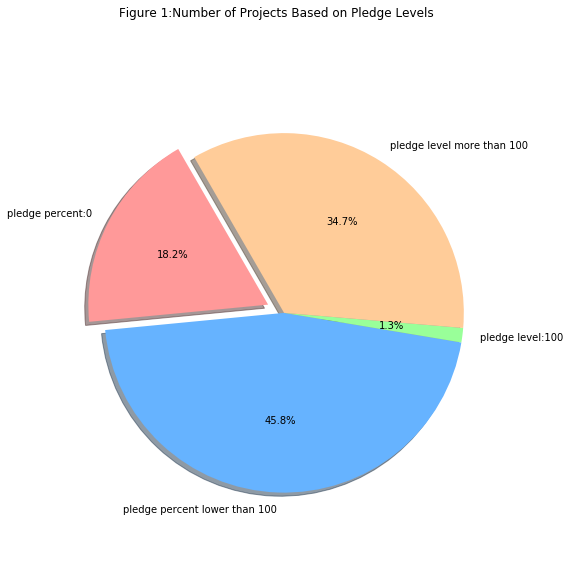

,name,category,main_category,currency,deadline,launched,country,usd_goal_real,percent_pledged,How_many_day,canceled
19263,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17 00:00:00,2016-08-18 09:04:03,US,1.00,10427789.0,59,0.0
155887,Energy Hook,Video Games,Games,USD,2013-06-10 00:00:00,2013-05-10 01:22:38,US,1.00,4153501.0,30,0.0
53058,Heartbreak Hits – Theo Katzman's Second LP,Music,Music,USD,2017-01-03 00:00:00,2016-11-04 15:52:18,US,1.00,2467500.0,59,0.0
91470,"Penny Arcade's Podcast, ""Downloadable Content""...",Radio & Podcasts,Publishing,USD,2013-05-31 00:00:00,2013-05-08 20:02:14,US,10.00,2303606.7,22,0.0
125208,THE 'mi8' RISES | The Best Wireless Duo Stereo...,Hardware,Technology,USD,2016-10-13 00:00:00,2016-09-13 18:03:12,US,1.00,2260300.0,29,0.0
57421,CO-OP THE GAME (Canceled),Video Games,Games,CAD,2013-10-14 00:00:00,2013-09-09 23:15:12,CA,0.97,1697085.6,34,1.0
34137,Worst Game Ever,Tabletop Games,Games,USD,2014-06-28 00:00:00,2014-05-29 00:11:29,US,1.00,1580400.0,29,0.0
284602,Graveface Archival Series,Music,Music,USD,2014-08-31 00:00:00,2014-08-01 16:39:06,US,1.00,1432877.0,29,0.0
135731,Braiiiins! ...it will not die!,Tabletop Games,Games,USD,2015-03-18 00:00:00,2015-02-16 16:43:35,US,1.00,1298400.0,29,0.0
204300,"Multi-Purpose, All-Occasion Greeting Cards",Printing,Crafts,USD,2015-11-07 00:00:00,2015-10-15 02:53:44,US,2.00,1257515.0,22,0.0


In [96]:
labels = 'pledge percent:0', 'pledge percent lower than 100','pledge level:100', 'pledge level more than 100'
sizes = [53652, 135196,3817 , 102259]
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=120)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Figure 1:Number of Projects Based on Pledge Levels",y=1.08)
fig1.set_size_inches( 8, 8)
plt.tight_layout()
plt.show()
large_pledge=data.nlargest(10,'percent_pledged')
large_pledge

The most significant pledge percentages have shallow funding targets.

Funding on Kickstarter is all-or-nothing. It means that the funding goal is the amount of money that a creator needs to complete their project.  No one will be charged for a pledge towards a project unless it reaches its funding goal(from Wikipedia).

Based on this information %36 of the projects are successful.

### Funding Goal 

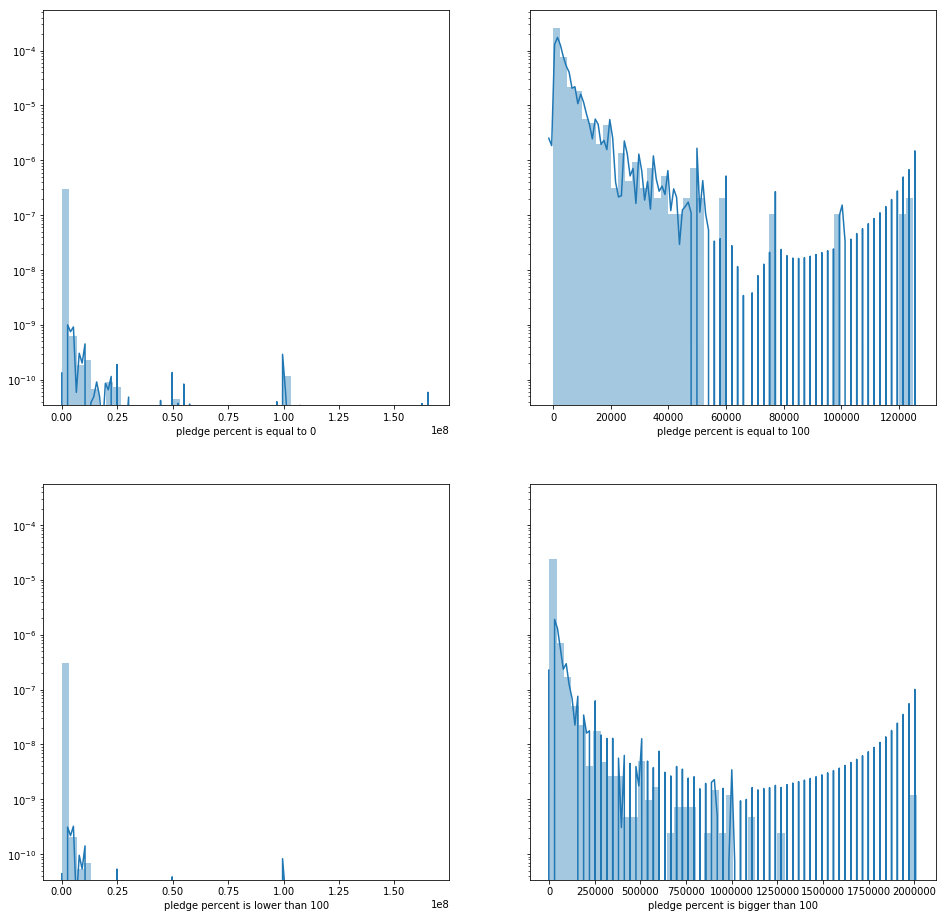

In [51]:
f, axes = plt.subplots(2, 2, figsize=(16, 16), sharex=False,sharey=True)
sns.distplot(data_0['usd_goal_real'],ax=axes[0, 0],
             axlabel='pledge percent is equal to 0')
sns.distplot(data_100['usd_goal_real'],ax=axes[0, 1],
             axlabel='pledge percent is equal to 100')
sns.distplot(data_no_success['usd_goal_real'],ax=axes[1, 0],
             axlabel='pledge percent is lower than 100')
sns.distplot(data_much['usd_goal_real'],ax=axes[1,1],
             axlabel='pledge percent is bigger than 100')
plt.yscale('log')
plt.show()

As can be seen on log scale distribution graphs the lower amount of funding goals are much successful than high targets.

## Plotting the words


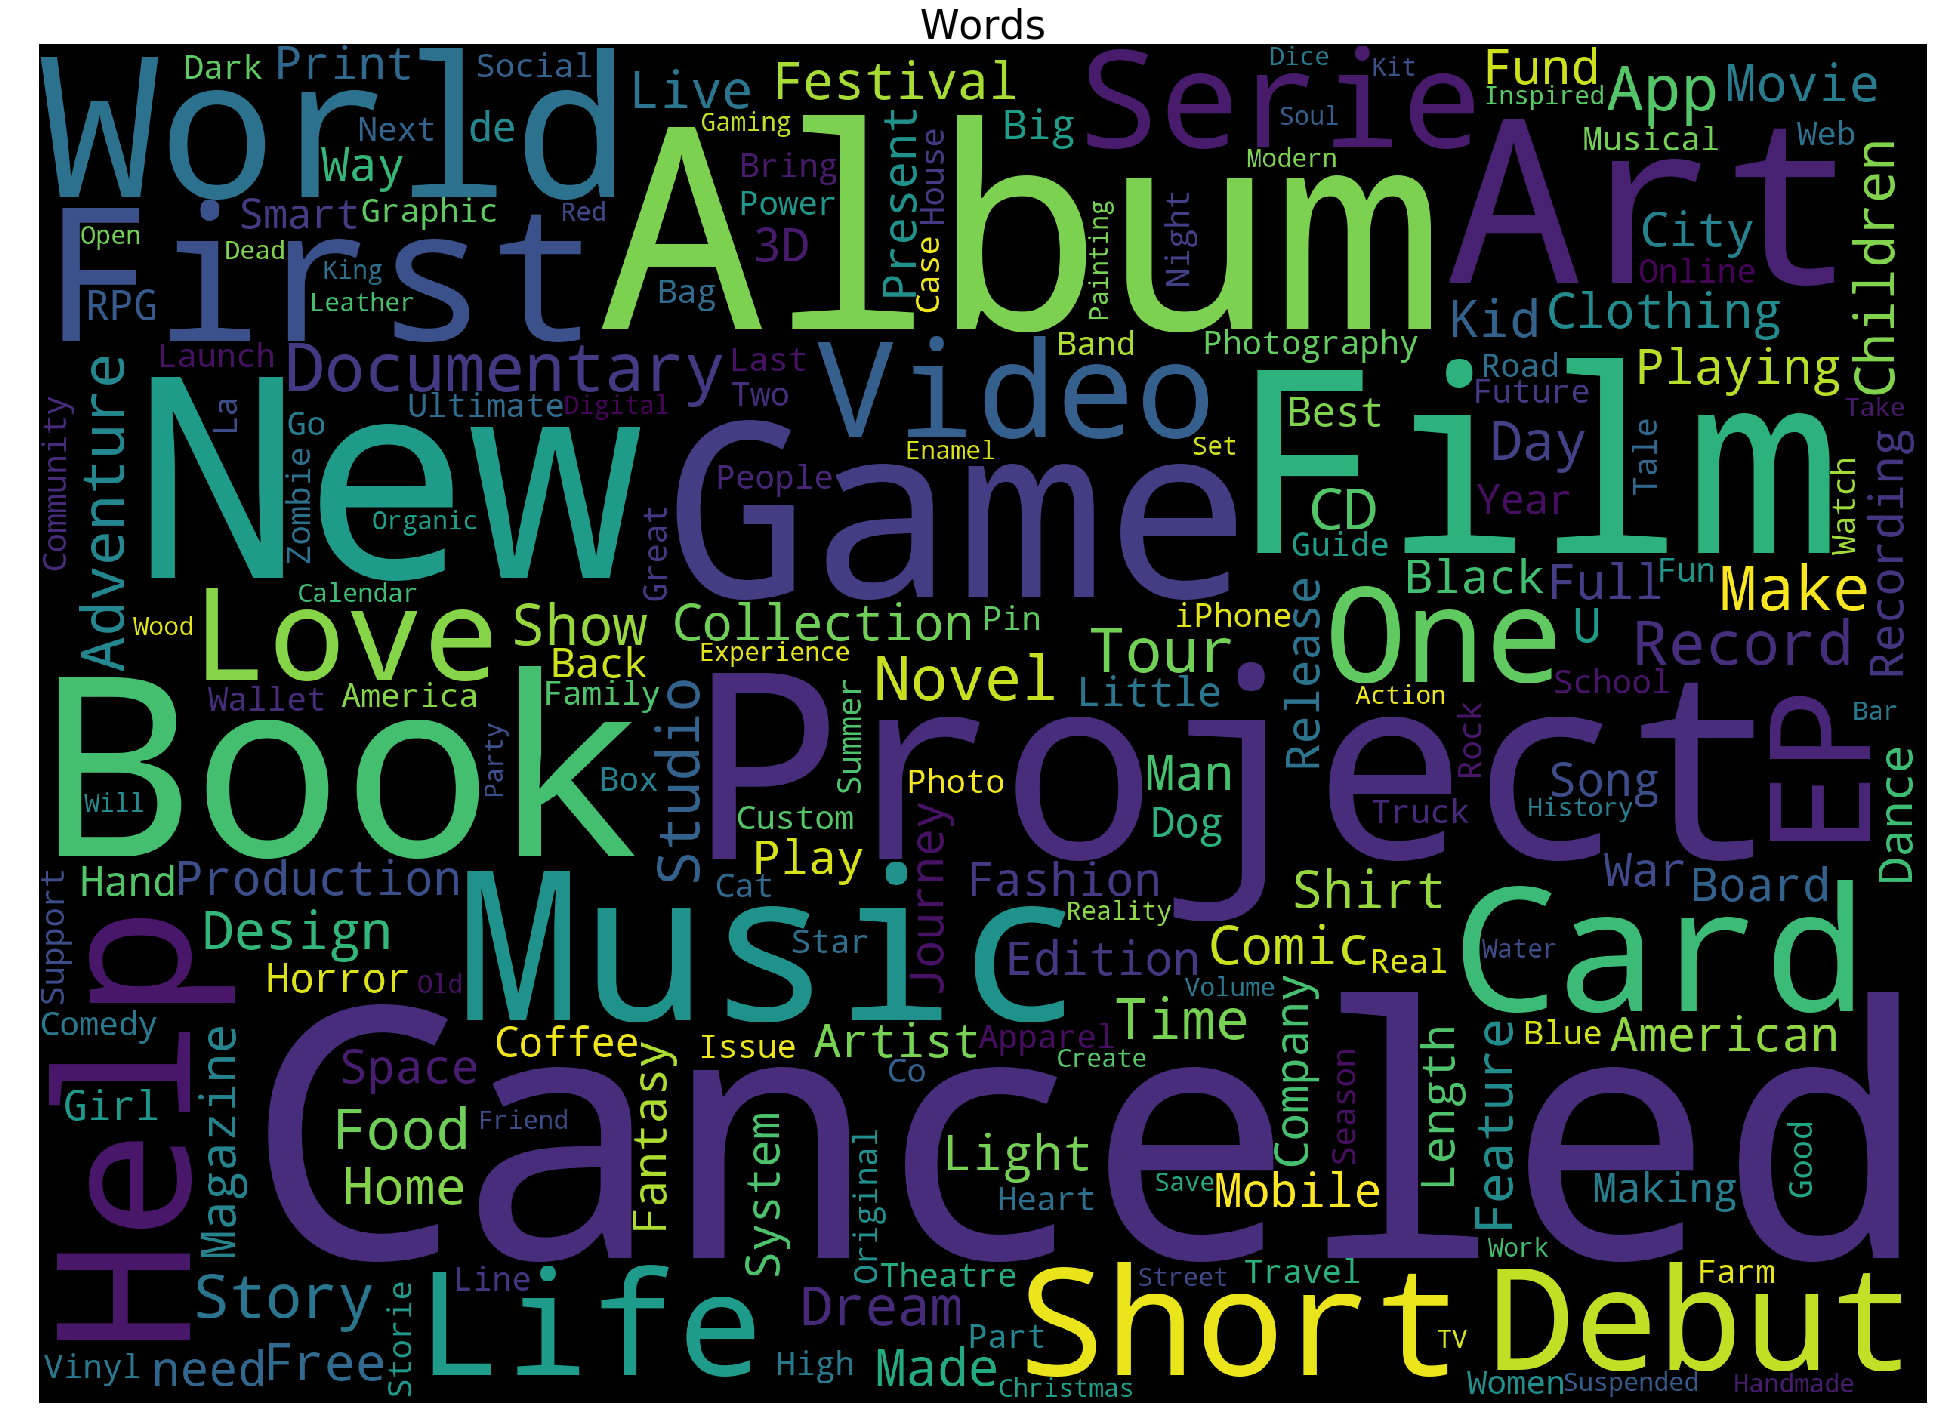

In [82]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
subset = data[['name','category','main_category']]
text_1 = subset.name.values
cloud_Ins = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text_1))
plt.axis('off')
plt.title("Words",fontsize=40)
plt.imshow(cloud_Ins)


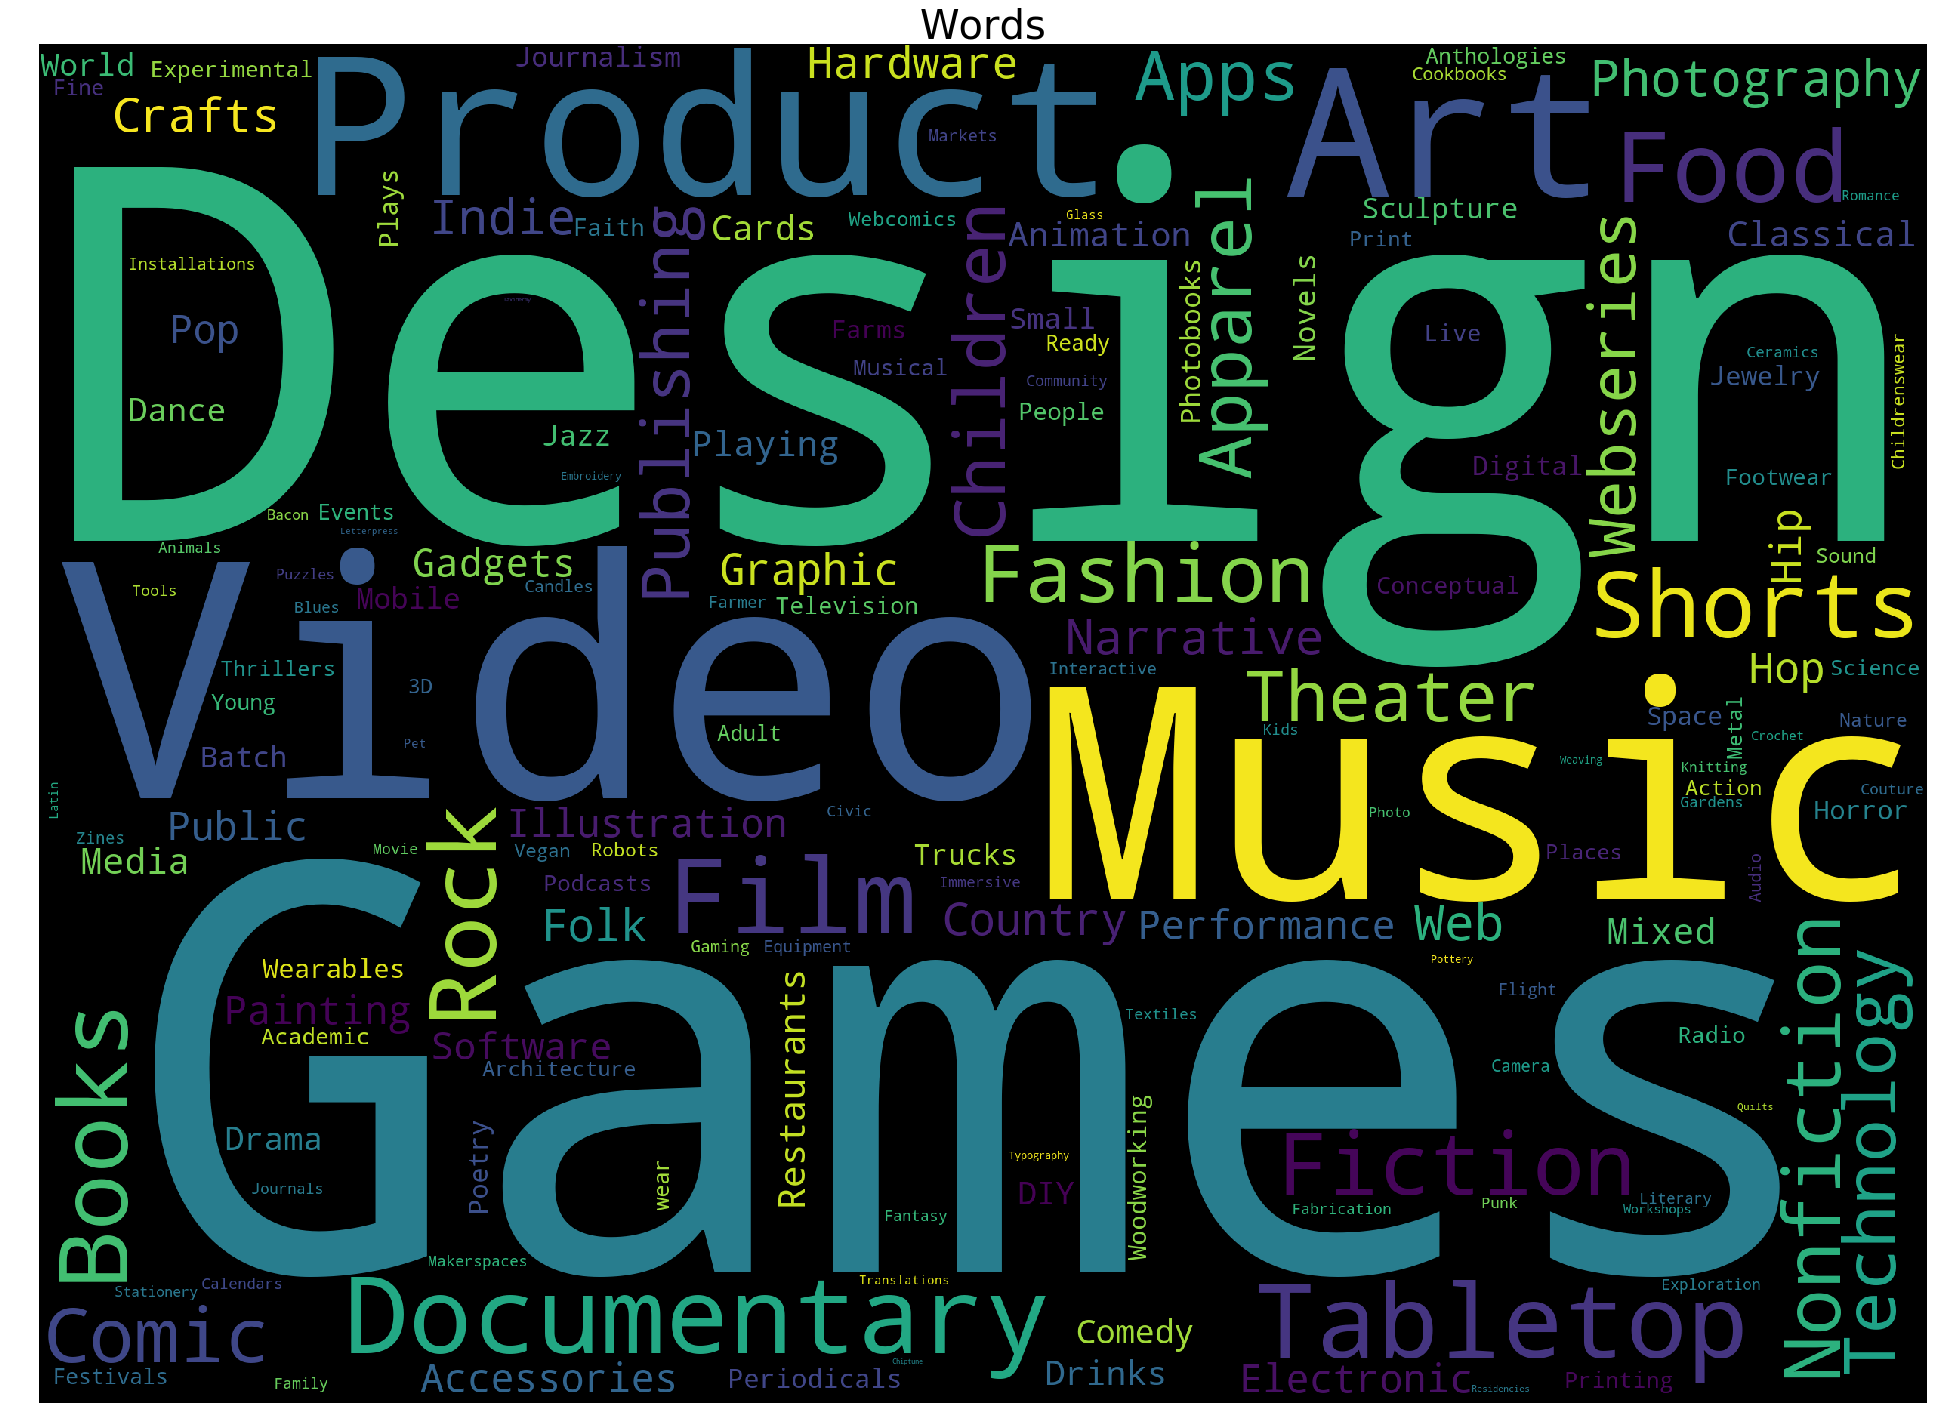

In [83]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
subset = data[['name','category','main_category']]
text_1 = subset.category.values
cloud_Ins = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text_1))
plt.axis('off')
plt.title("Words",fontsize=40)
plt.imshow(cloud_Ins)

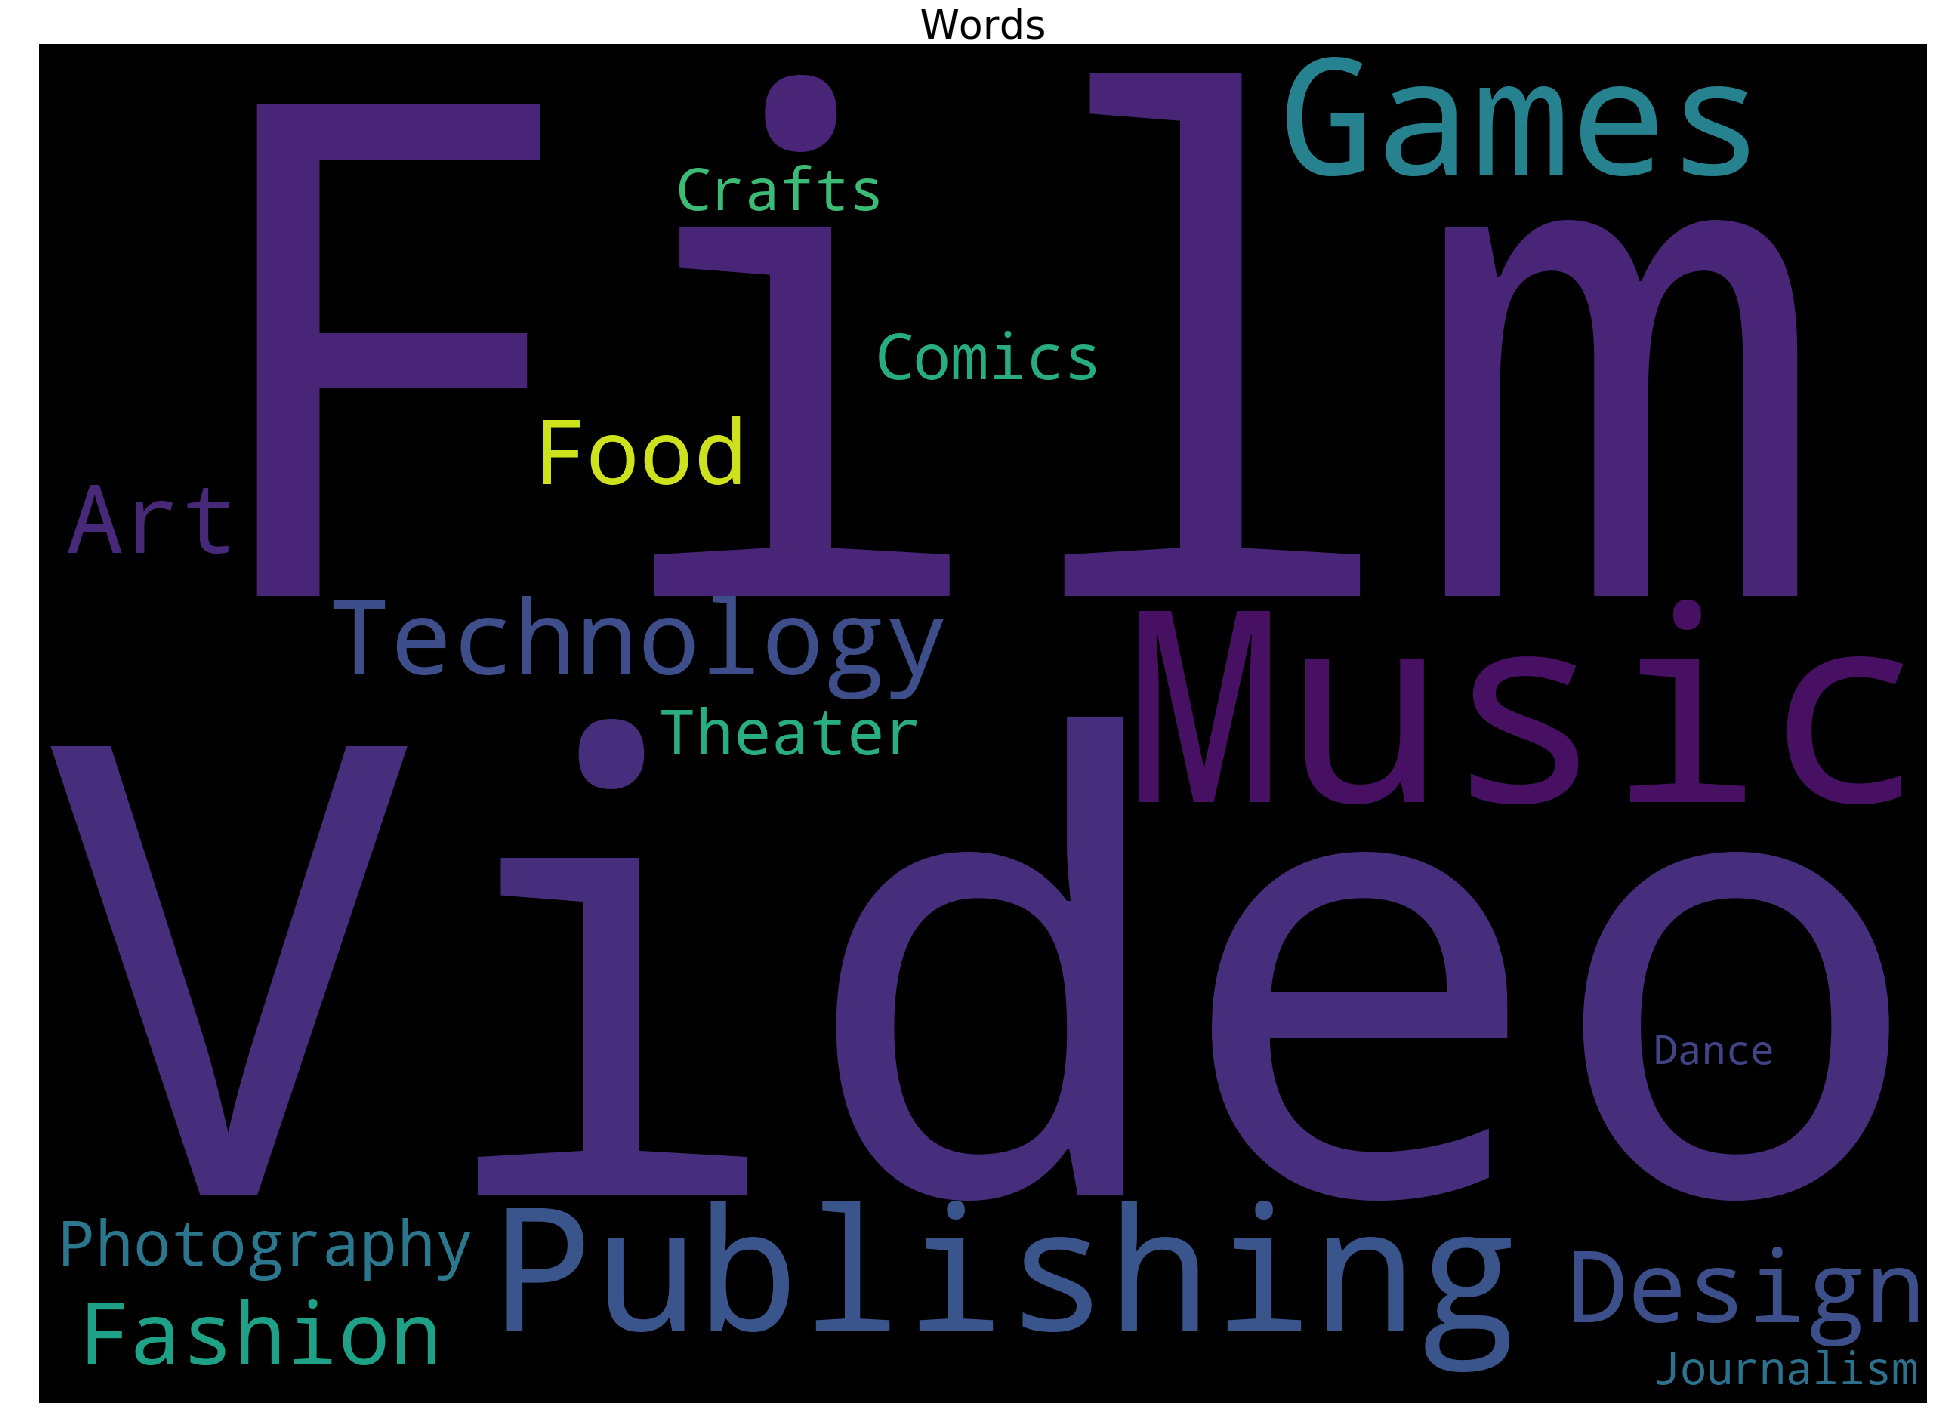

In [84]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
subset = data[['name','category','main_category']]
text_1 = subset.main_category.values
cloud_Ins = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text_1))
plt.axis('off')
plt.title("Words",fontsize=40)
plt.imshow(cloud_Ins)

## Plotting the categorical variables


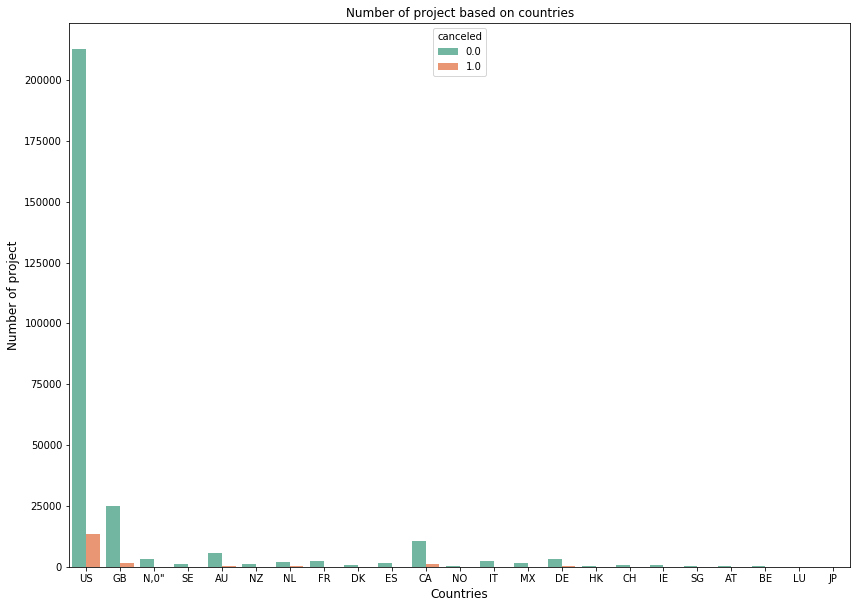

In [90]:
ax=sns.countplot(x="country",hue='canceled', data=data,palette="Set2")
plot_sp('Number of project based on countries',12,'Countries','Number of project')

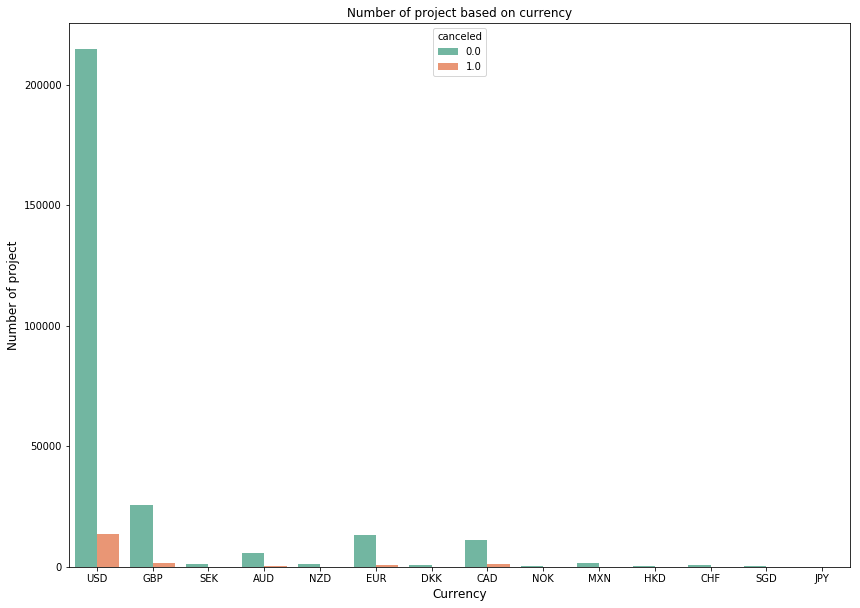

In [91]:
ax=sns.countplot(x="currency",hue='canceled', data=data,palette="Set2")
plot_sp('Number of project based on currency',12,'Currency','Number of project')

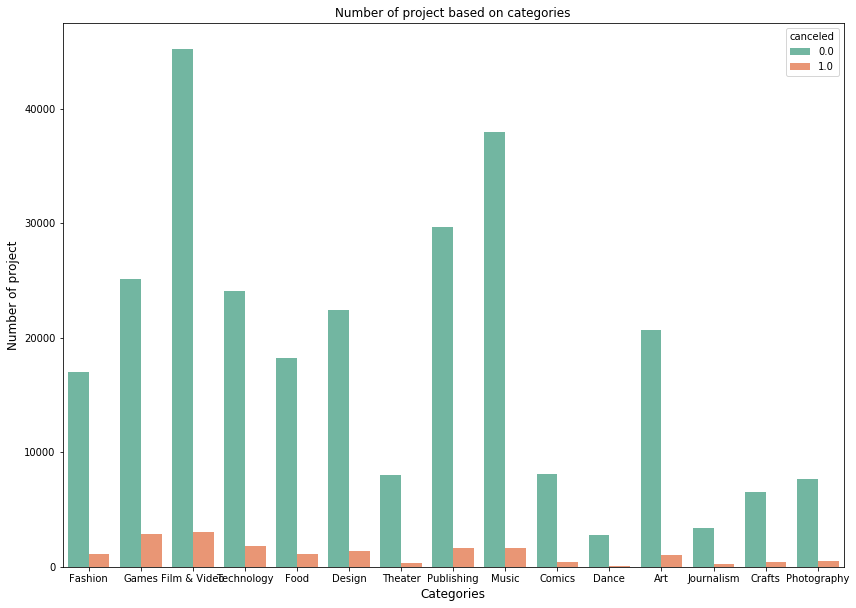

In [92]:
ax=sns.countplot(x="main_category",hue='canceled', data=data,palette="Set2")
plot_sp('Number of project based on categories',12,'Categories','Number of project')